my_project/
├── README.md
├── requirements.txt
├── .gitignore
├── data/
│   ├── raw/
│   ├── processed/
├── notebooks/
│   ├── 01_data_exploration.ipynb
│   ├── 02_data_cleaning.ipynb
│   ├── 03_feature_engineering.ipynb
│   ├── 04_modeling.ipynb
│   ├── 05_evaluation.ipynb
├── scripts/
│   ├── data_loading.py
│   ├── data_preprocessing.py
│   ├── feature_engineering.py
│   ├── modeling.py
├── models/
├── output/
│   ├── figures/
│   ├── tables/
│   ├── reports/

In [1]:
import pandas as pd

In [10]:
df = pd.read_csv('data/zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [12]:
melted = pd.melt(df, 
                 id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 
                          'Metro', 'CountyName'], 
                 var_name='time')
melted['time'] = pd.to_datetime(melted['time'], format="%Y-%m")
melted.head()



,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0


In [13]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901595 entries, 0 to 3901594
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionName  int64         
 1   RegionID    int64         
 2   SizeRank    int64         
 3   City        object        
 4   State       object        
 5   Metro       object        
 6   CountyName  object        
 7   time        datetime64[ns]
 8   value       float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 267.9+ MB


In [11]:
df.dtypes.value_counts()

float64    219
int64       49
object       4
Name: count, dtype: int64

In [14]:
for dtype in ['float64', 'int64', 'object']:
    print(dtype)
    display(df.select_dtypes(include=dtype).head())
    print('')

float64


,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
0,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,...,856700.0,856600.0,854400.0,853000.0,856200.0,859700.0,863900.0,872900.0,883300.0,889500.0
1,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,...,223800.0,226500.0,228600.0,230400.0,231800.0,233000.0,234200.0,235400.0,236600.0,238500.0
2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,...,269200.0,271000.0,273100.0,275600.0,277600.0,279800.0,282100.0,284200.0,286000.0,288300.0
3,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,...,1123700.0,1135100.0,1141000.0,1143900.0,1145800.0,1147500.0,1149900.0,1155200.0,1160100.0,1163300.0
4,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,...,112800.0,112500.0,112400.0,112000.0,111500.0,111400.0,112000.0,112500.0,112700.0,113100.0



int64


,RegionID,RegionName,SizeRank,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,1,892800,893600,891300,889900,891500,893000,893000,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,2,240500,242600,244700,246300,247600,249600,251400,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,3,290700,293300,295900,298300,300200,301300,301700,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,4,1167700,1173900,1175100,1173500,1175500,1178500,1176400,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,5,113900,114400,114500,114400,114300,114400,114700,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500



object


,City,State,Metro,CountyName
0,Chicago,IL,Chicago,Cook
1,McKinney,TX,Dallas-Fort Worth,Collin
2,Katy,TX,Houston,Harris
3,Chicago,IL,Chicago,Cook
4,El Paso,TX,El Paso,El Paso


The first 7 columns provide the info and should be either object or integer dtypes. After that we can convert the rest to datetime. 

# Step 2: Data Preprocessing

In [3]:
dates = pd.to_datetime(df.columns.values[7:],format='%Y-%m')

In [44]:
dates

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

(array([27., 26., 27., 26., 27., 26., 26., 27., 26., 27.]),
 array([ 9587. , 10390.5, 11194. , 11997.5, 12801. , 13604.5, 14408. ,
        15211.5, 16015. , 16818.5, 17622. ]),
 <BarContainer object of 10 artists>)

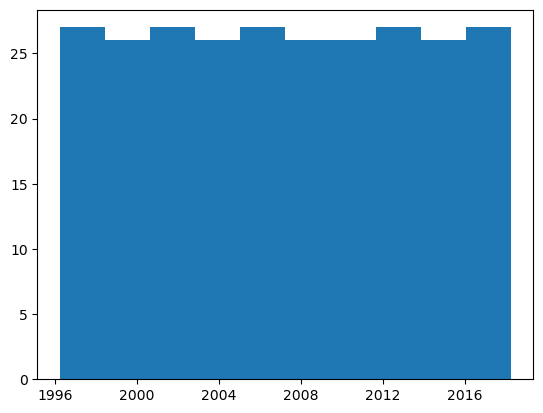

In [43]:
import matplotlib.pyplot as plt

plt.hist(dates)

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [52]:
for column in ['City','State', 'Metro', 'CountyName']:
    display(df[column].value_counts())
    print('----------------------------------------')

City
New York          114
Los Angeles        95
Houston            88
San Antonio        48
Washington         45
                 ... 
Carp Lake           1
Haskins             1
Tahoe Vista         1
Collettsville       1
Scaly Mountain      1
Name: count, Length: 7554, dtype: int64

----------------------------------------


State
CA    1224
NY    1015
TX     989
PA     831
FL     785
OH     588
IL     547
NJ     502
MI     499
IN     428
NC     428
MA     417
TN     404
VA     401
MN     375
GA     345
WA     341
WI     332
MO     319
MD     317
CO     249
KS     241
AZ     230
OR     224
OK     221
SC     206
NH     199
LA     193
AL     183
IA     158
MS     153
KY     139
CT     124
UT     121
ID     110
AR     105
NV     103
ME      86
NE      83
WV      72
MT      71
HI      62
NM      60
RI      59
DE      41
WY      31
ND      31
AK      28
SD      19
DC      18
VT      16
Name: count, dtype: int64

----------------------------------------


Metro
New York                          779
Los Angeles-Long Beach-Anaheim    347
Chicago                           325
Philadelphia                      281
Washington                        249
                                 ... 
Liberal                             1
Uvalde                              1
Sweetwater                          1
Los Alamos                          1
New Ulm                             1
Name: count, Length: 701, dtype: int64

----------------------------------------


CountyName
Los Angeles    264
Jefferson      175
Orange         166
Washington     164
Montgomery     159
              ... 
Schuyler         1
Kimball          1
Kinney           1
Carson           1
Ellsworth        1
Name: count, Length: 1212, dtype: int64

----------------------------------------


In [49]:
df['City'].value_counts()

City
New York          114
Los Angeles        95
Houston            88
San Antonio        48
Washington         45
                 ... 
Carp Lake           1
Haskins             1
Tahoe Vista         1
Collettsville       1
Scaly Mountain      1
Name: count, Length: 7554, dtype: int64

In [57]:
df.loc[df['Metro']=='Chicago']['CountyName'].value_counts()

CountyName
Cook       140
Lake        39
Du Page     34
Will        26
Kane        22
McHenry     18
DeKalb      10
Kenosha     10
Porter       6
Kendall      6
Grundy       6
Jasper       4
Newton       4
Name: count, dtype: int64

# Step 4: Reshape from Wide to Long Format

In [5]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [9]:
df_melt = melt_data(df)
df_melt.head()

/var/folders/tr/nsz262r16ds7x1bjc8q7xq180000gn/T/ipykernel_8191/1276467365.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)


,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


In [7]:
df.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


# Step 5: ARIMA Modeling

# Step 6: Interpreting Results